<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo_18/blob/main/Semana_4_Actividad_1_Equipo_18_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

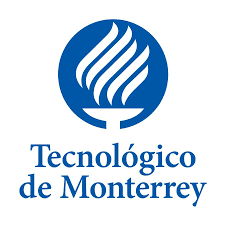

# **TC4029 Ciencia y analítica de datos**

Semana 4 - Actividad 1

Moisés Rangel Silva A00143704

José Eduardo Esperón Carreón A01372413

Profesor: Jobish Vallikavungal Devassia

Octubre 11 de 2022

## Normalization

In [2]:
import pandas as pd
import numpy as np

In [3]:
inPath = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [4]:
df = pd.read_csv(inPath, index_col = 0)
df.index.name = None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [5]:
df.X1.min()

10000

In [6]:
varX = df.X1.head(10)
varX

1      20000
2     120000
3      90000
4      50000
5      50000
6      50000
7     500000
8     100000
9     140000
10     20000
Name: X1, dtype: int64

### 1. Normalization - rescales a dataset so that each value falls between 0 and 1.

Forumula: 

$$ x_i^{new} = \cfrac{x_i^{old} - x_{min}}{x_{max} - x_{min}}$$ 

In [7]:
def normalize(x):
    min = np.min(x)
    max = np.max(x)
    range = max - min
    return [(a - min) / range for a in x]

In [8]:
X = varX.copy()
normalizedValues = normalize(X)

print(normalizedValues)

[0.0, 0.20833333333333334, 0.14583333333333334, 0.0625, 0.0625, 0.0625, 1.0, 0.16666666666666666, 0.25, 0.0]


In [9]:
print(min(normalizedValues))
print(max(normalizedValues))

0.0
1.0


### 1.1 Normalizing from [0, 1] to any other range

$$x_i^{new}=x_i^{old}\cdot\left(rango_{nuevo}\right)+ LimiteInferior_{nueva} $$

In [10]:
def normalize(normalizedX, nLoBound, nUpBound):
    range = nUpBound - nLoBound

    return [a * range + nLoBound for a in normalizedX]

In [11]:
normalizedX = normalizedValues.copy()
Y = normalize(normalizedX, 10, 20)

print(Y)

[10.0, 12.083333333333334, 11.458333333333334, 10.625, 10.625, 10.625, 20.0, 11.666666666666666, 12.5, 10.0]


### 1.2 Normalización de un rango a otro

$$x_i^{new}=\left(\frac{x_{i^{}}^{old}-\min\left(A\right)}{\max\left(A\right)-\min\left(A\right)}\right)\cdot\left(rango_{nuevo}\right)+LimiteInferior_{nueva}$$

In [12]:
def normalize(x, nLoBound, nUpBound):
    min = np.min(x)
    max = np.max(x)
    range = max - min
    nRange = nUpBound - nLoBound

    return [((xi - min) / range) * nRange + nLoBound for xi in X]


In [13]:
X = varX.copy()
Y = normalize(X, 100, 200)

print(Y)

[100.0, 120.83333333333334, 114.58333333333333, 106.25, 106.25, 106.25, 200.0, 116.66666666666666, 125.0, 100.0]


# Normalización de un df

Podemos usar el siguiente código para aplicar una normalización min-max a cada columna en el DataFrame:

In [14]:
ndf = df.copy()
ndf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [15]:
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [16]:
ndf.drop(['X1', 'X2', 'X3', 'X4', 'X5'], 
         axis = 1, 
         inplace = True
        )
ndf

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [17]:
(
    (ndf-ndf.min())/
    (ndf.max()-ndf.min()) 
).head()

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
2,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
3,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
4,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
5,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0


### 1.3 Always there are alternatives....

In [18]:
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler

In [19]:
X = df.X1.head(10).to_frame()

scaler = preprocessing.MinMaxScaler().fit(X)
#scaler

In [20]:
scaler.fit_transform(X)

array([[0.        ],
       [0.20833333],
       [0.14583333],
       [0.0625    ],
       [0.0625    ],
       [0.0625    ],
       [1.        ],
       [0.16666667],
       [0.25      ],
       [0.        ]])

### 2. Standardization - rescales a dataset to have a mean of 0 and a standard deviation of 1. 

In [21]:
X = varX.copy().to_frame()

In [22]:
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [23]:
X_scaledA = scaler.transform(X)
X_scaledA = pd.DataFrame(X_scaledA)
X_scaledA

,0
0,-0.699780
1,0.044667
2,-0.178667
3,-0.476446
4,-0.476446
5,-0.476446
6,2.873564
7,-0.104223
8,0.193556
9,-0.699780


In [24]:
import scipy.stats as stats
X_scaledB = stats.zscore(X)
X_scaledB

,X1
1,-0.699780
2,0.044667
3,-0.178667
4,-0.476446
5,-0.476446
6,-0.476446
7,2.873564
8,-0.104223
9,0.193556
10,-0.699780


In [25]:
import statistics as sts

In [26]:
sd = sts.pstdev(X.X1) #pstdev - Population standard deviaiton. 
sd

134327.95688165587

In [27]:
xm = X.X1.mean()
xm

114000.0

In [30]:
X_scaledC = (X-xm)/sd
X_scaledC

,X1
1,-0.699780
2,0.044667
3,-0.178667
4,-0.476446
5,-0.476446
6,-0.476446
7,2.873564
8,-0.104223
9,0.193556
10,-0.699780


In [43]:
X_scaledB.mean()#(axis=0)  axis = 1 (axis='columns') -> -> -> operation -> -> ; axis =0  (axis='index') downward. 
#np.mean(X_scaledB)

X1   -1.110223e-17
dtype: float64

In [44]:
X_scaledB.std(axis=0)

X1    1.054093
dtype: float64

Scaled data has zero mean and unit variance